# Modeling and Simulation in Python

Mary Fung


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

### Earth Orbiting the Sun

In [2]:
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
year = UNITS.year

<Unit('year')>

In [3]:
x_0 = 147e9 * m
vy_0 = -30300 * m/s

init = State(x=x_0,
             y=0 * m,
             vx=0 * m/s,
             vy=vy_0)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,-30300.0 meter / second


In [5]:
r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

t_end = (1 * year).to_base_units()

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=t_end)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31556925.9747 second


In [6]:
def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x, y)
    
    force = -r.hat() * G * m1 * m2 / r.mag**2
    return Vector(force)

In [7]:
universal_gravitation(init, system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'newton')>

In [8]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)   

    F = universal_gravitation(state, system)
    a = F / m2
    
    return vx, vy, a.x, a.y

In [9]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30300.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [10]:
def event_func(state, t, system):
    x, y, vx, vy = state
    v = Vector(x, y)
    return v.mag - system.r_final

In [11]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [12]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[]]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [13]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [14]:
# Scaling the distance to million km
results.x /= 1e9
results.y /=1e9

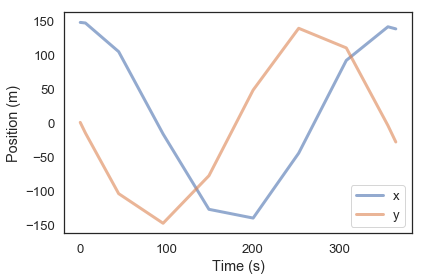

In [15]:
plot(results.x, label='x')
plot(results.y, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

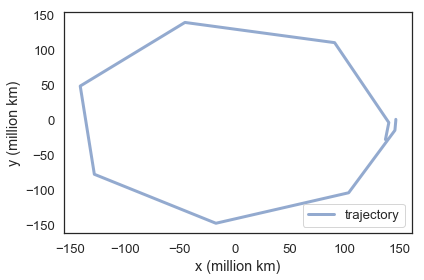

In [16]:
plot(results.x, results.y, label='trajectory')
decorate(xlabel='x (million km)',
         ylabel='y (million km)')

In [19]:
results, details = run_ode_solver(system, slope_func, events=event_func,
                                  method='RK23')
details

,values
sol,None
t_events,[[]]
nfev,137
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [21]:
results.index /= 60 * 60 * 24
results.x /= 1e9
results.y /=1e9

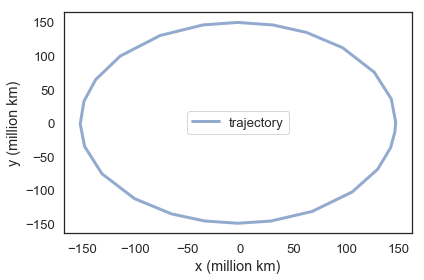

In [22]:
plot(results.x, results.y, label='trajectory')
decorate(xlabel='x (million km)',
         ylabel='y (million km)')